# Task 1 Iris Flowers Classification ML Project

# Author: Pratyush Srivastava

### LGM VIP September 2021

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species

-- Iris Setosa

-- Iris Versicolour

-- Iris Virginica



In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Now we will load our dataset

df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

# We have 150 rows and 6 Columns in our dataset

In [5]:
# Now we will drop those columns which are not for use in our task
df = df.drop('Id', axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# After removing Id Column we will now check if there is any missing values in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There is no null values in our dataset, so we will now start analysis on our dataset

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# now we will check missing values in our dataset
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### There is no Missing Value found in this Dataset

In [9]:
from sklearn.cluster import KMeans

In [10]:
#Training data
x = df.iloc[:, [0,1,2,3]].values

In [11]:
#clustering using k=5.
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)
kmeans5.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 3 4 0 3 3 0 2 0 3 0 3
 3 3 4 3 3 3 0 0 4 3 4 0 4 3 0 4 4 3 0 0 0 3 4 4 0 3 3 4 3 3 3 4 3 3 3 4 3
 3 4]


array([[7.475     , 3.125     , 6.3       , 2.05      ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [6.24722222, 2.84722222, 4.775     , 1.575     ]])

In [12]:
#Elbow method
Error =[]
for i in range(1, 11):
 kmeans = KMeans(n_clusters = i).fit(x)    
 kmeans.fit(x)    
 Error.append(kmeans.inertia_)

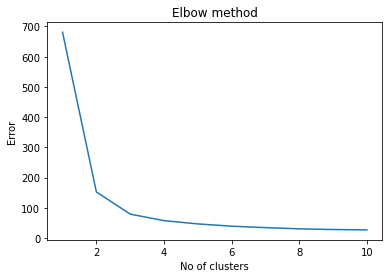

In [13]:
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [14]:
#clustering using k=3
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)
kmeans3.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

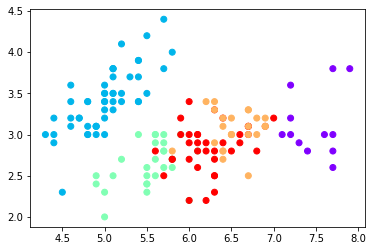

In [15]:
#Visualization of data
# k=5
plt.scatter(x[:,0],x[:,1],c=y_kmeans5,cmap='rainbow')

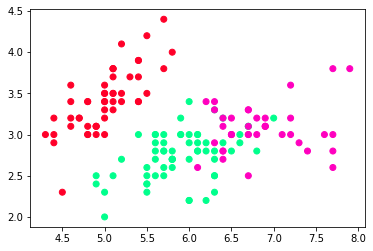

In [16]:
#Visualization of data
# k=3
plt.scatter(x[:,0],x[:,1],c=y_kmeans3,cmap='gist_rainbow')